### 【問題1】公式チュートリアルモデルを分担して実行
TensorFLowの公式チュートリアルモデルを分担して実行してください。


以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

import warnings
warnings.filterwarnings('ignore')

2.3.0


- IMDB datasetのダウンロード

In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

>num_words = 訓練データ中に出てくる単語のうち、最も頻繁に出現する10,000個を保持するためのもの
>データサイズを管理可能にするため、稀にしか出現しない単語は破棄

- データの観察

In [3]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

>前処理済みのデータであり、（単語の連なりである）レビューが、「整数」の配列に変換されている

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

>ラベルはそれぞれ、0または1の整数値で、0が否定的レビュー、1が肯定的なレビュー

In [6]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [7]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
len(train_data[0]), len(train_data[1])

(218, 189)

- 整数を単語に戻してみる

In [9]:
# 単語を整数にマッピングする辞書
word_index = imdb.get_word_index()

# インデックスの最初の方は予約済み
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [10]:
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [11]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

- データの準備

In [12]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

>映画レビューは同じ長さでなければならないので、長さを標準化する pad_sequences 関数を使用
>
>[tf.keras.preprocessing.sequence.pad_sequences](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences?hl=ja)

In [13]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [14]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

- モデルの構築

>ニューラルネットワーク: 層を積み重ねることで構成\
>この際、２つの大きな決定が必要
>
> - モデルにいくつの層を設けるか？
> - 層ごとに何個の隠れユニットを使用するか？

In [15]:
# 入力の形式は映画レビューで使われている語彙数（10,000語）
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

>確率を扱うにはbinary_crossentropyの方が適しています。\
>binary_crossentropyは、確率分布の間の「距離」を測定する尺度です。\
>今回の場合には、真の分布と予測値の分布の間の距離ということになります。

- 検証用データを作る

In [17]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

- モデルの訓練

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 0s 11ms/step - loss: 0.6920 - accuracy: 0.5623 - val_loss: 0.6901 - val_accuracy: 0.6039
Epoch 2/40
30/30 [==============================] - 0s 7ms/step - loss: 0.6865 - accuracy: 0.6588 - val_loss: 0.6824 - val_accuracy: 0.7475
Epoch 3/40
30/30 [==============================] - 0s 7ms/step - loss: 0.6751 - accuracy: 0.7319 - val_loss: 0.6682 - val_accuracy: 0.7488
Epoch 4/40
30/30 [==============================] - 0s 7ms/step - loss: 0.6540 - accuracy: 0.7750 - val_loss: 0.6438 - val_accuracy: 0.7639
Epoch 5/40
30/30 [==============================] - 0s 7ms/step - loss: 0.6216 - accuracy: 0.7860 - val_loss: 0.6091 - val_accuracy: 0.7837
Epoch 6/40
30/30 [==============================] - 0s 7ms/step - loss: 0.5802 - accuracy: 0.8072 - val_loss: 0.5682 - val_accuracy: 0.8004
Epoch 7/40
30/30 [==============================] - 0s 7ms/step - loss: 0.5333 - accuracy: 0.8257 - val_loss: 0.5250 - val_accuracy: 0.8186
Epoch 8/40
30/30 [=

- モデルの評価

In [19]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 0s - loss: 0.3287 - accuracy: 0.8717
[0.3287062644958496, 0.8716800212860107]


- 正解率と損失の時系列グラフを描く

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

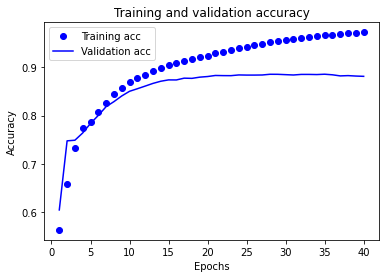

In [22]:
plt.clf()   # 図のクリア

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [23]:
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

### 【問題2】（アドバンス課題）様々な手法を実行
TensorFLowやGoogle AI ResearchのGitHubリポジトリには、定番のモデルから最新のモデルまで多様なコードが公開されています。これらから興味あるものを選び実行してください。


なお、これらのコードは初学者向けではないため、巨大なデータセットのダウンロードが必要な場合など、実行が簡単ではないこともあります。そういった場合は、コードリーディングを行ってください。

__回答なし__

### 【問題3】Iris（2値分類）をKerasで学習

TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。

In [24]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras import backend as K

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.callbacks import CSVLogger

In [25]:
"""
TensorFlowで実装したニューラルネットワークを使いIrisデータセットを2値分類する
"""

# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((64, 4), (20, 4), (64, 1), (20, 1), (16, 4), (16, 1))

In [27]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10
n_input = X_train.shape[1]
n_hidden1 = 50
n_hidden2 = 100
n_classes = 1

In [28]:
K.clear_session()

model = Sequential()
model.add(Dense(input_dim=n_input, units=n_hidden1, activation='relu'))
model.add(Dense(input_dim=n_hidden1, units=n_hidden2, activation='relu'))
model.add(Dense(input_dim=n_hidden2, units=n_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size, epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
7/7 [==============================] - 0s 16ms/step - loss: 0.8035 - accuracy: 0.4688 - val_loss: 0.7361 - val_accuracy: 0.3750
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.6406 - val_loss: 0.5398 - val_accuracy: 0.7500
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7031 - val_loss: 0.5135 - val_accuracy: 0.8125
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 0.4480 - accuracy: 0.9375 - val_loss: 0.4103 - val_accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8750 - val_loss: 0.3881 - val_accuracy: 0.9375
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.9375 - val_loss: 0.2716 - val_accuracy: 0.9375
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.2521 - accuracy: 0.9375 - val_loss: 0.2273 - val_accuracy: 1.0000
Epoch 8/10
7/7 [=================

In [31]:
train_score = model.evaluate(X_train, y_train, verbose=0)
val_score = model.evaluate(X_val, y_val, verbose=0)

print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Val loss:', val_score[0])
print('Val accuracy:', val_score[1])

Train loss: 0.12378564476966858
Train accuracy: 0.96875
Val loss: 0.11864219605922699
Val accuracy: 1.0


In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

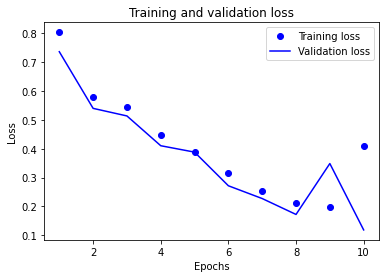

In [33]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

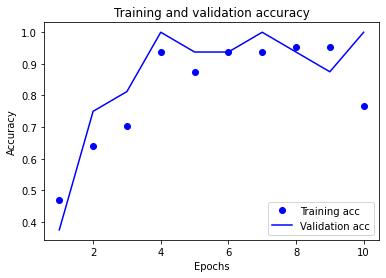

In [34]:
plt.clf()   # 図のクリア

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
pred_test = np.round(model.predict(X_test)).astype('int')

print(pred_test.flatten())
print(y_test.flatten())

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0]


### 【問題4】Iris（多値分類）をKerasで学習

TensorFlowによるIrisデータセットに対する3値分類をKerasに書き換えてください。

In [36]:
# データセットの読み込み
dataset_path ="Iris.csv"
df = pd.read_csv(dataset_path)

In [37]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
# データフレームから条件抽出
#df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")] #削除
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)

# ラベルを数値に変換
y[y=='Iris-setosa'] = 0 #追加
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2
y = y.astype(np.int)[:, np.newaxis]

#One-Hotエンコーディング
enc = OneHotEncoder(categories='auto', sparse=False)
y = enc.fit_transform(y)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [39]:
# ハイパーパラメータの設定
learning_rate = 0.001
batch_size = 10
num_epochs = 10
n_input = X_train.shape[1]
n_hidden1 = 50
n_hidden2 = 100
n_classes = 3

In [40]:
K.clear_session()

model = Sequential()
model.add(Dense(input_dim=n_input, units=n_hidden1, activation='relu'))
model.add(Dense(input_dim=n_hidden1, units=n_hidden2, activation='relu'))
model.add(Dense(input_dim=n_hidden2, units=n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size, epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
10/10 [==============================] - 0s 12ms/step - loss: 1.0426 - accuracy: 0.4271 - val_loss: 0.8732 - val_accuracy: 0.7083
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.6875 - val_loss: 0.7533 - val_accuracy: 0.7083
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.8125 - val_loss: 0.6705 - val_accuracy: 0.7500
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.7500 - val_loss: 0.6185 - val_accuracy: 0.7083
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.6979 - val_loss: 0.5556 - val_accuracy: 0.7083
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.9688 - val_loss: 0.5190 - val_accuracy: 0.8333
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.8021 - val_loss: 0.4943 - val_accuracy: 0.7083
Epoch 8/10
10/10 [=

In [43]:
train_score = model.evaluate(X_train, y_train, verbose=0)
val_score = model.evaluate(X_val, y_val, verbose=0)

print('Train loss : {:.4f}'.format(train_score[0]))
print('Train accuracy : {:.3f}'.format(train_score[1]))
print('Val loss : {:.4f}'.format(val_score[0]))
print('Val accuracy : {:.3f}'.format(val_score[1]))

Train loss : 0.3387
Train accuracy : 0.979
Val loss : 0.4148
Val accuracy : 0.917


In [44]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

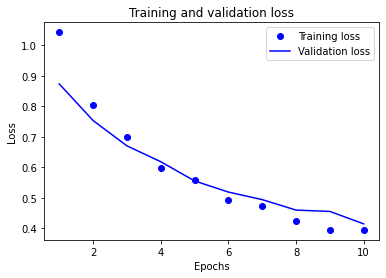

In [45]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

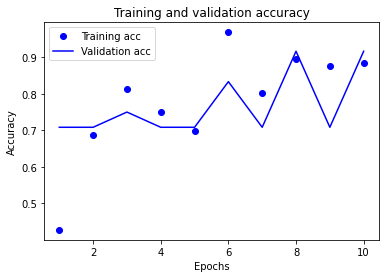

In [46]:
plt.clf()   # 図のクリア

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [47]:
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=1)

print(pred_test)
print(np.argmax(y_test, axis=1))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 2 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


### 【問題5】House PricesをKerasで学習

TensorFlowによるHouse Pricesデータセットに対する回帰をKerasに書き換えてください。

In [48]:
df_train = pd.read_csv('train.csv')

x_columns = ['GrLivArea', 'YearBuilt']
y_column = ['SalePrice']

X_columns = pd.DataFrame(df_train, columns=x_columns)
y_saleprice = pd.DataFrame(df_train, columns=y_column)

df = pd.concat([X_columns, y_saleprice], axis=1)

X = df[x_columns].values
y = df[y_column].values

#標準化
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [49]:
X.shape, y.shape

((1460, 2), (1460, 1))

In [50]:
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [51]:
# ハイパーパラメータの設定
learning_rate = 0.001 #0.000000001
batch_size = 10
num_epochs = 10
n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

In [52]:
K.clear_session()

model = Sequential()
model.add(Dense(input_dim=n_input, units=n_hidden1, activation='relu'))
model.add(Dense(input_dim=n_hidden1, units=n_hidden2, activation='relu'))
model.add(Dense(input_dim=n_hidden2, units=n_classes, activation=None))

optimizer = tf.keras.optimizers.RMSprop(learning_rate)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,351
Trainable params: 5,351
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size, epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
94/94 [==============================] - 0s 2ms/step - loss: 39274196992.0000 - mae: 181528.0469 - mse: 39274196992.0000 - val_loss: 37137879040.0000 - val_mae: 177900.3594 - val_mse: 37137879040.0000
Epoch 2/10
94/94 [==============================] - 0s 886us/step - loss: 39263916032.0000 - mae: 181498.8906 - mse: 39263916032.0000 - val_loss: 37121626112.0000 - val_mae: 177854.3438 - val_mse: 37121626112.0000
Epoch 3/10
94/94 [==============================] - 0s 927us/step - loss: 39239360512.0000 - mae: 181430.7500 - mse: 39239360512.0000 - val_loss: 37089374208.0000 - val_mae: 177763.4531 - val_mse: 37089374208.0000
Epoch 4/10
94/94 [==============================] - 0s 857us/step - loss: 39194730496.0000 - mae: 181309.3125 - mse: 39194730496.0000 - val_loss: 37033967616.0000 - val_mae: 177610.4375 - val_mse: 37033967616.0000
Epoch 5/10
94/94 [==============================] - 0s 873us/step - loss: 39125221376.0000 - mae: 181119.2969 - mse: 39125221376.0000 - val_loss: 

In [55]:
train_score = model.evaluate(X_train, y_train, verbose=0)
val_score = model.evaluate(X_val, y_val, verbose=0)

print('Train loss : {:.4f}'.format(train_score[0]))
print('Train accuracy : {:.3f}'.format(train_score[1]))
print('Val loss : {:.4f}'.format(val_score[0]))
print('Val accuracy : {:.3f}'.format(val_score[1]))

Train loss : 38042615808.0000
Train accuracy : 178223.219
Val loss : 35939926016.0000
Val accuracy : 174631.609


### 【問題6】MNISTをKerasで学習

TensorFlowによるMNISTデータセットによる画像の多値分類をKerasに書き換えてください。

In [56]:
df_train = pd.read_csv('mnist_train.csv')

X = df_train.iloc[:, 1:].values
y = df_train.iloc[:, :1].values

In [57]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

#One-Hotエンコーディング
enc = OneHotEncoder(categories='auto', sparse=False)
y = enc.fit_transform(y)

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [59]:
# ハイパーパラメータの設定
learning_rate = 0.001
batch_size = 100
num_epochs = 10
n_hidden1 = 100
n_hidden2 = 50
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

In [60]:
K.clear_session()

model = Sequential()
model.add(Dense(input_dim=n_input, units=n_hidden1, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(input_dim=n_hidden1, units=n_hidden2, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(input_dim=n_hidden2, units=n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 84,660
Trainable params: 84,360
Non-trainable params: 300
_________________________________________________________________


In [62]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size, epochs=num_epochs,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
269/269 [==============================] - 1s 2ms/step - loss: 0.4099 - accuracy: 0.8834 - val_loss: 0.1957 - val_accuracy: 0.9400
Epoch 2/10
269/269 [==============================] - 1s 2ms/step - loss: 0.1572 - accuracy: 0.9550 - val_loss: 0.1410 - val_accuracy: 0.9576
Epoch 3/10
269/269 [==============================] - 1s 2ms/step - loss: 0.1068 - accuracy: 0.9699 - val_loss: 0.1170 - val_accuracy: 0.9658
Epoch 4/10
269/269 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9770 - val_loss: 0.1254 - val_accuracy: 0.9609
Epoch 5/10
269/269 [==============================] - 1s 2ms/step - loss: 0.0572 - accuracy: 0.9828 - val_loss: 0.1266 - val_accuracy: 0.9621
Epoch 6/10
269/269 [==============================] - 1s 2ms/step - loss: 0.0416 - accuracy: 0.9884 - val_loss: 0.1129 - val_accuracy: 0.9667
Epoch 7/10
269/269 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9913 - val_loss: 0.1035 - val_accuracy: 0.9717
Epoch 

In [63]:
train_score = model.evaluate(X_train, y_train, verbose=0)
val_score = model.evaluate(X_val, y_val, verbose=0)

print('Train loss : {:.4f}'.format(train_score[0]))
print('Train accuracy : {:.3f}'.format(train_score[1]))
print('Val loss : {:.4f}'.format(val_score[0]))
print('Val accuracy : {:.3f}'.format(val_score[1]))

Train loss : 0.0159
Train accuracy : 0.996
Val loss : 0.1030
Val accuracy : 0.969


In [64]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

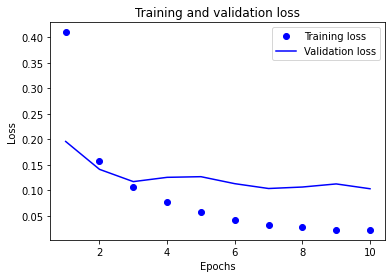

In [65]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

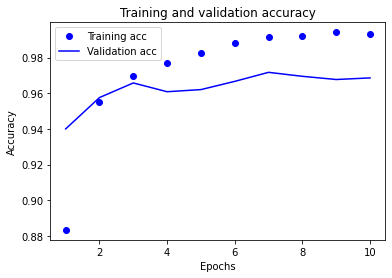

In [66]:
plt.clf()   # 図のクリア

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [67]:
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=1)

print(pred_test)
print(np.argmax(y_test, axis=1))

[3 6 9 ... 2 7 2]
[3 6 9 ... 2 7 2]


### 【問題7】（アドバンス課題）PyTorchへの書き換え

4種類の問題をPyTorchに書き換えてください。

__回答なし__

### 【問題8】（アドバンス課題）フレームワークの比較

それぞれのフレームワークにはどのような違いがあるかをまとめてください。

__回答なし__